In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

In [2]:
import statsmodels.api as sm

In [12]:
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from statsmodels.graphics.gofplots import ProbPlot

In [4]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [5]:
Carseats = load_data("Carseats")
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [6]:
##data insights
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [7]:
##model
y = Carseats['Sales']
X = MS(['Price', 'Urban', 'US']).fit_transform(Carseats)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


In [8]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           2.39e-23
Time:                        21:07:59   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.0

In [9]:
##new model
y = Carseats['Sales']
X = MS(['Price', 'US']).fit_transform(Carseats)
model2 = sm.OLS(y, X)
results2 = model2.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


In [10]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           2.66e-24
Time:                        21:08:07   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.0

In [11]:
inter_coef = 13.0308
inter_std_err = .631

US_coef = 1.1996
US_std_err = .258

price_coef = -.0545
price_std_err = .005

print('95%% confidence interval for Intercept: [ %2.4f; %2.4f] ' % (inter_coef-2*inter_std_err, inter_coef+2*inter_std_err))
print('95%% confidence interval for US: [ %2.4f; %2.4f] ' % (US_coef-2*US_std_err, US_coef+2*US_std_err))
print('95%% confidence interval for Price: [ %2.4f; %2.4f] ' % (price_coef-2*price_std_err, price_coef+2*price_std_err))

95% confidence interval for Intercept: [ 11.7688; 14.2928] 
95% confidence interval for US: [ 0.6836; 1.7156] 
95% confidence interval for Price: [ -0.0645; -0.0445] 


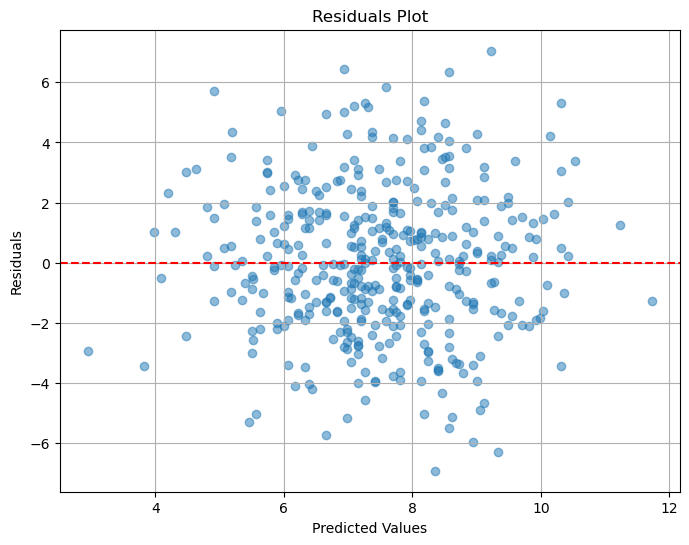

In [19]:
##to get residual plot
residuals = results2.resid
predicted_values = results2.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

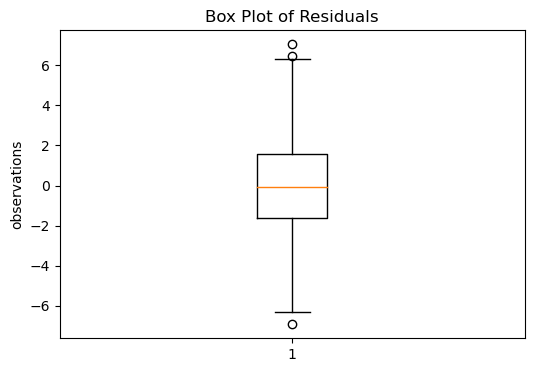

In [22]:
## residuals outliners
plt.figure(figsize=(6, 4))
plt.boxplot(residuals)
plt.title('Box Plot of Residuals')
plt.ylabel('Residuals')
plt.ylabel('observations')
plt.show()

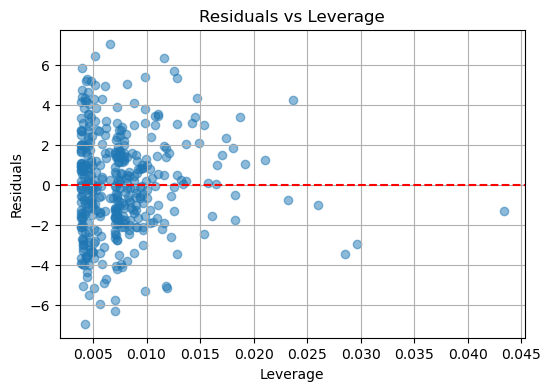

In [21]:
## check for outliners & leverage plot
fitted_y = results2.fittedvalues
normalized_resid = results2.get_influence().resid_studentized_internal
absolute_sqrt_norm_resid = np.sqrt(np.abs(normalized_resid))
absolute_resid = np.abs(residuals)
leverage = results2.get_influence().hat_matrix_diag
plt.figure(figsize=(6, 4))
plt.scatter(leverage, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [29]:
## chapter 3 problem 12
from sklearn.linear_model import LinearRegression 
x = np.arange(100)
y = np.random.normal(size=100)

In [30]:
## data insights
print(x)
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[-4.88181980e-01 -4.81998746e-03 -8.15887543e-01  8.34441074e-01
  9.75737149e-01  1.63955497e-01 -7.92983337e-01  2.00584940e+00
 -6.75896917e-01  6.32449019e-01  9.86554830e-01 -3.76405114e-02
 -1.41927734e+00  2.16828281e-01 -1.01196799e+00  8.55131628e-01
  1.79092292e+00 -6.52221420e-01  2.21915189e-01 -5.33394057e-01
  9.31629336e-01  4.19267838e-01 -7.95536236e-01  1.15214089e+00
 -1.51552650e-01 -5.05272865e-01  1.09080519e+00 -2.49072946e-03
  3.56303605e-01 -2.76006767e-01  4.99118581e-01  8.04910412e-01
 -2.57146473e-01  1.60140044e-01 -1.62868733e+00  1.63626803e+00
  2.16129516e+00 -6.03027533e-02  1.18187796e+00  9.06824345e-01
 -3.73912616e-03 -4.23846053e-01 -3.21445773

In [31]:
x = x.reshape(np.shape(x)[0],1)
y = y.reshape(np.shape(y)[0],1)

In [36]:
lin_regression = LinearRegression(fit_intercept=False)
lin_regression.fit(x,y)
lin_regression.coef_

array([[0.00153255]])

In [37]:
lin_regression.fit(y,x)
lin_regression.coef_

array([[5.57981941]])

In [38]:
x = np.arange(100)
y = np.random.permutation(x)
print(x)
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[64 71 79 80 62  3  4 89 36 99 83 42 50 67 20 38 94  8 66 95 78 35 82 31
 84 97  9 24  2 88 13 98 93 77 32  5 10 30 12 33 51 85 45 72 18 63 91 81
 17 75 40 27 92 53 49 70 69 65 56 52 61 39 14 68 46 21  6 87 41 15 55 34
 28 11 58 25  0 73 29 26  7 43 96 47 57 76 48 16 54 60 44 90 59 74 22  1
 23 37 19 86]


In [40]:
x = x.reshape(np.shape(x)[0],1)
y = y.reshape(np.shape(y)[0],1)
lin_regression = LinearRegression(fit_intercept=False)
lin_regression.fit(x,y)
lin_regression.coef_

array([[0.70396833]])

In [41]:
lin_regression.fit(y,x)
lin_regression.coef_

array([[0.70396833]])

In [43]:
###99% confidence interval
p=0.52
z_star = 2.58
SE = 0.024
n = 1000
Std_err_for_frac_population =  z_star * (SE / (n**0.5))
Confidence_Interval_99_percent = (p - Std_err_for_frac_population, p + Std_err_for_frac_population)
Confidence_Interval_99_percent

(0.5180419176728237, 0.5219580823271763)